## Note
This AI is designed to run on Vanilla. Meaning it will need to be run on a seperate instance of the game.

In [56]:
# Main imports
import time
import numpy as np
from PIL import Image, ImageGrab
from matplotlib import pyplot as plt
import cv2
import pickle

## Task 1: Set up terminal map coords
#### Steps:
1- Open Lethal Company.

2- In the settings, set the "Display Mode" to one of the following:

    - "Windowed fullscreen"
    - "Maximized window"
    - "Window". This is not recomended. But if you must use it, make sure to maximize the window from the top bar everytime you open the game, so that the positions of the elements on the screen are the same everytime.

3- After that, join a new game, land in any moon, enter the terminal, and open the map by writing "View Monitor".

4- Take a screenshot of your full screen.

5- Open the screenshot in an editing software that shows coordinates. I use paint.net.

6- Get the coordinate of the top left pixel of the map, and insert it as the first and second elements in the "sscords" variable in the next cell.

7- Get the coordinates of the bottom right pixel of the map, and insert it as the third and fourth elements in the "sscords" variable in the next cell.

8- Run the following 2 cells.

In [11]:
sscoords = (467, 320, 1330, 948)

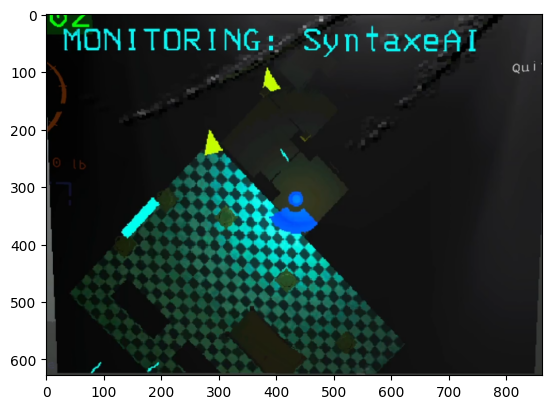

In [12]:
time.sleep(3)
original_img = ImageGrab.grab(bbox=sscoords)
image_np = np.array(original_img)

plt.imshow(original_img)
plt.show()

Make sure the image shown after running the cell captures that whole map as precisely as possible.

## Task 2: Set up terminal chat coords
#### Steps:
1- While in the game, leave the terminal (If you're on it).

2- Send 3 capital "Z"s in the text chat without spaces between them.

3- Take the coords around the 3 Zs in the chat (like we did for the map).

4- Run the following 2 cells, which will split the screenshot into 3 sections (1 for each Z), then saves it seperately. To ensure the screenshots are correct, make sure each of the 3 sections is capturing 1 of the Zs.

In [14]:
chatcoords = (947, 1112, 1067, 1146)

In [ ]:
# Use this to get the arrays of the letters.
img = ImageGrab.grab(bbox=chatcoords)
image_np = np.array(img)
mask = np.zeros((image_np.shape[0], image_np.shape[1]))

for i in range(image_np.shape[0]):  # Iterate over rows (height)
    for j in range(image_np.shape[1]):  # Iterate over columns (width)
        r, g, b = image_np[i, j]
        r = int(r)
        g = int(g)
        b = int(b)

        if abs(r - g) < 20 and abs(b - r) > 40 and r > 70 and b < 100:
            mask[i, j] = 1
        else: 
            mask[i, j] = 0

print("Full screenshot mask")
plt.imshow(mask)
plt.show()

first = mask[:, :16]
second = mask[:, 16:32]
third = mask[:, 32:]
np.save("first.npy", first)
print("First Z")
plt.imshow(first)
plt.show()
np.save("second.npy", second)
print("Second Z")
plt.imshow(second)
plt.show()
np.save("third.npy", third)
print("Third Z")
plt.imshow(third)
plt.show()

## Task 3: Set up player center coords.
#### Steps:
1- While in the game, enter the terminal and open the map by running the command "View Monitor".

2- Run the following 3 cells.

3- Update "player_circle_center_1" and "player_circle_center_2" until the red dots in the images in the second and third cells are right in the center of the player's blue circle.

In [48]:
player_circle_center_1 = (128, 174) # The player center when the image is resized to 0.4 of the original size.
player_circle_center_2 = (64, 86) # The player center when the image is resized to 0.2 of the original size.

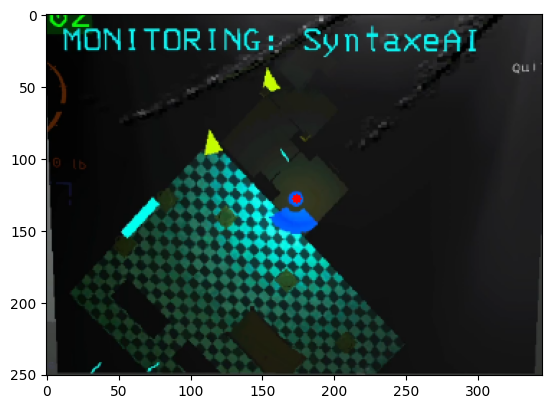

In [49]:
# Finding the player center
# Keep changing the center until the red circle is right in the middle of the player's blue circle.
time.sleep(3)
original_img = ImageGrab.grab(bbox=sscoords)
image_np = np.array(original_img)
# Sizing Img Down
scale_fraction = 0.4
width = int(image_np.shape[1] * scale_fraction)
height = int(image_np.shape[0] * scale_fraction)
dim = (width, height)
image_np = cv2.resize(image_np, dim)

cv2.circle(image_np, (player_circle_center_1[1], player_circle_center_1[0]), radius=3, color=(255, 0, 0), thickness=-1)

plt.imshow(image_np)
plt.show()

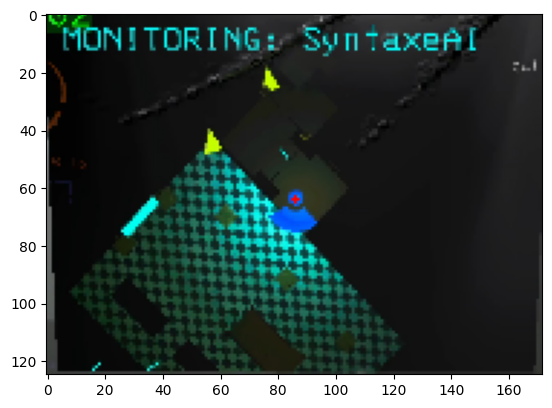

In [51]:
# Finding the player center
# Keep changing the player_circle_center_1 until the red circle is right in the middle of the player's blue circle.
time.sleep(3)
original_img = ImageGrab.grab(bbox=sscoords)
image_np = np.array(original_img)
# Sizing Img Down
scale_fraction = 0.2
width = int(image_np.shape[1] * scale_fraction)
height = int(image_np.shape[0] * scale_fraction)
dim = (width, height)
image_np = cv2.resize(image_np, dim)

cv2.circle(image_np, (player_circle_center_2[1], player_circle_center_2[0]), radius=1, color=(255, 0, 0), thickness=-1)

plt.imshow(image_np)
plt.show()

## Finally: Saving the parameters.
Now run the following cell so you can save all the parameters.
After that, you are ready to use any of the 3 AI files.


In [64]:
with open('player_circle_center_1.pkl', 'wb') as file:
    pickle.dump(player_circle_center_1, file)
with open('player_circle_center_2.pkl', 'wb') as file:
    pickle.dump(player_circle_center_2, file)
with open('sscoords.pkl', 'wb') as file:
    pickle.dump(sscoords, file)
with open('chatcoords.pkl', 'wb') as file:
    pickle.dump(chatcoords, file)

## Task 4 (Optional): Voice Chat.

Note that in this section, we'll setup a virtual audio device that will reroute your computer's sound output to the sound input. This will result in the following:

    - Any sound played on your device, will come out of your mic. This will allow us to make the AI speak into the mic.
    - You will no longer be able to hear any sound coming out of your device using your headphones or speaker, since they will be replaced in the settings with the virtual audio software.

### This setup should only be done on the computer you're planning to run the AI from.

#### Steps:
1- Enter the game settings and completely reduce the volume of the game.

2- Install VB Audio on your device. This will be the virtual audio software we use. To download it, look up "vb audio" on Google, or use this link: https://vb-audio.com/Cable/index.htm

3- Open your computer's sound settings and set VB Audio to be the sound input and the sound output device.

4- In Lethal Company Settings. Choose VB Audio as the sound input device. And then set the sound input mode to "Voice Activation".

5- You can test if this is working by running the following cell. Your teammate in-game should be able to hear the Google TTS message.

This setup will cause any sound that comes out of your computer to be routed into Lethal Company where your teammates will hear it. This will allow the AI to communicate with you by using Google TTS.

In [53]:
from gtts import gTTS
import os
from playsound import playsound

# Text to be converted to speech
text = "Hello, this is a test sentence."

# Convert text to speech
tts = gTTS(text)
tts.save("output_test.mp3")

# Play the audio file (this will play through the default audio device)
playsound("output_test.mp3")

# Clean up
os.remove("output_test.mp3")